<a href="https://colab.research.google.com/github/Navjotkhatri/OIBSIP/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-5**
## **Project Name- SALES PREDICTION USING PYTHON**
**Contributor-Navjot Khatri**

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.



In [79]:
#import library
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

In [81]:
from scipy import stats
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret.regression import *
from pycaret  import regression
from sklearn.model_selection import cross_val_score

In [82]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
#reading csv file
working_dir_path="/content/drive/MyDrive/Colab Notebooks/Oasis Intern projects/Sales Prediction Using Python/Advertising.csv"
sales_df=pd.read_csv(working_dir_path)

In [84]:
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [85]:
sales_df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [86]:
sales_df.shape

(200, 5)

In [87]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [88]:
sales_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [89]:
sales_df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [90]:
sales_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [91]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [92]:
data_cleaning_suggestions(sales_df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
TV,190,float64,0,0.000000,95.000000,0,
Newspaper,172,float64,0,0.000000,86.000000,0,
Radio,167,float64,0,0.000000,83.500000,0,
Sales,121,float64,0,0.000000,60.500000,0,


<Axes: >

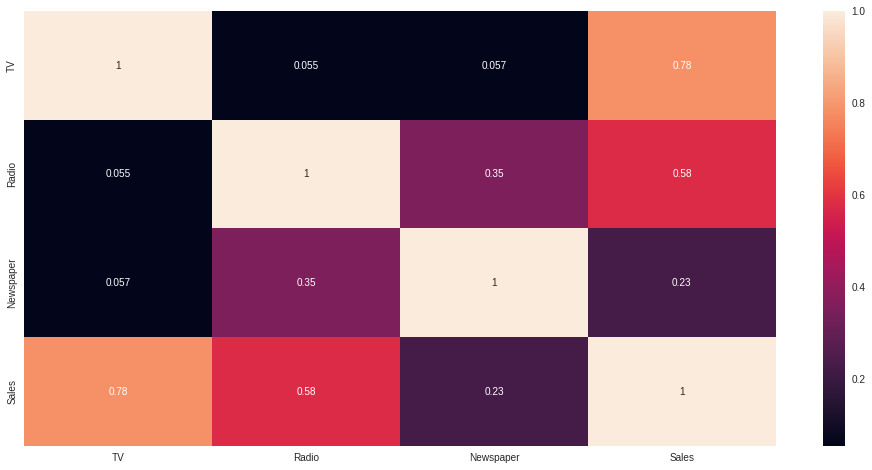

In [93]:
plt.figure(figsize=(15,8))
sns.heatmap(sales_df.corr(),annot=True)

**Detect OutLiers**

In [94]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

In [95]:
detect_outliers(sales_df)

,Outlier_percentage
Newspaper,1.0
TV,0.0
Radio,0.0
Sales,0.0


In [96]:
X = sales_df.drop('Sales', axis = 1)
y = sales_df['Sales']

In [97]:
sl = setup(data = sales_df, target = 'Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [98]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4624,0.4099,0.6207,0.9829,0.0638,0.0524,0.5330
rf,Random Forest Regressor,0.6819,0.7522,0.8463,0.9707,0.0810,0.0698,0.7190
gbr,Gradient Boosting Regressor,0.6543,0.7543,0.8449,0.9695,0.0821,0.0685,0.2940
xgboost,Extreme Gradient Boosting,0.7092,0.8571,0.9083,0.9628,0.0842,0.0708,0.1970
ada,AdaBoost Regressor,0.9118,1.3620,1.1184,0.9487,0.1028,0.0923,0.3430
dt,Decision Tree Regressor,0.9336,1.6092,1.2321,0.9283,0.1167,0.0949,0.0600
lightgbm,Light Gradient Boosting Machine,0.9731,1.8903,1.3323,0.9196,0.1434,0.1178,0.1980
knn,K Neighbors Regressor,1.2407,2.7481,1.6193,0.8813,0.1221,0.1120,0.0710
llar,Lasso Least Angle Regression,1.3834,3.3047,1.7501,0.8674,0.1721,0.1612,0.1030
lasso,Lasso Regression,1.3834,3.3047,1.7500,0.8674,0.1721,0.1612,0.0750


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

**Extra Trees Regressor Model**

In [104]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3637,0.3478,0.5897,0.9842,0.0373,0.0286
1,0.6276,1.1538,1.0741,0.9629,0.2399,0.2001
2,0.4551,0.4245,0.6515,0.9864,0.0389,0.0328
3,0.4281,0.3163,0.5624,0.9733,0.0404,0.0326
4,0.4111,0.2964,0.5444,0.9760,0.0422,0.0323
5,0.4338,0.2968,0.5448,0.9871,0.0384,0.0359
6,0.4693,0.3032,0.5506,0.9909,0.0468,0.0407
7,0.4261,0.2542,0.5042,0.9869,0.0565,0.0431
8,0.4567,0.3008,0.5485,0.9910,0.0603,0.0414


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [105]:
et = finalize_model(et)
et

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['TV', 'Radio', 'Newspaper'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

**Prediction**

In [106]:
preds = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


**R2 Score : 1.00**

In [109]:
preds

,TV,Radio,Newspaper,Sales,prediction_label
140,199.800003,3.100000,34.599998,11.400000,11.400000
141,80.199997,0.000000,9.200000,8.800000,8.800000
142,74.699997,49.400002,45.700001,14.700000,14.700000
143,44.700001,25.799999,20.600000,10.100000,10.100000
144,147.300003,23.900000,19.100000,14.600000,14.600000
145,238.199997,34.299999,5.300000,20.700001,20.700001
146,165.600006,10.000000,17.600000,12.600000,12.600000
147,182.600006,46.200001,58.700001,21.200001,21.200001
148,188.399994,18.100000,25.600000,14.900000,14.900000
149,11.700000,36.900002,45.200001,7.300000,7.300000


In [110]:
sales_prediction=preds

In [112]:
sales_prediction.head()

,TV,Radio,Newspaper,Sales,prediction_label
140,199.800003,3.100000,34.599998,11.4,11.4
141,80.199997,0.000000,9.200000,8.8,8.8
142,74.699997,49.400002,45.700001,14.7,14.7
143,44.700001,25.799999,20.600000,10.1,10.1
144,147.300003,23.900000,19.100000,14.6,14.6


In [116]:
sales_prediction= sales_prediction.rename(columns={'prediction_label': 'Sales_Prediction'}).reset_index()

In [117]:
sales_prediction

,index,TV,Radio,Newspaper,Sales,Sales_Prediction
0,140,199.800003,3.100000,34.599998,11.400000,11.400000
1,141,80.199997,0.000000,9.200000,8.800000,8.800000
2,142,74.699997,49.400002,45.700001,14.700000,14.700000
3,143,44.700001,25.799999,20.600000,10.100000,10.100000
4,144,147.300003,23.900000,19.100000,14.600000,14.600000
5,145,238.199997,34.299999,5.300000,20.700001,20.700001
6,146,165.600006,10.000000,17.600000,12.600000,12.600000
7,147,182.600006,46.200001,58.700001,21.200001,21.200001
8,148,188.399994,18.100000,25.600000,14.900000,14.900000
9,149,11.700000,36.900002,45.200001,7.300000,7.300000


**Extra Trees Regressor Model**

Extra Trees Regressor is an ensemble machine learning algorithm that is used for regression tasks. It is based on the Random Forest algorithm and works by creating a large number of decision trees, each using a random subset of the available features and data. It then combines the predictions of all these decision trees to make a final prediction. One key difference between Extra Trees and Random Forest is that Extra Trees selects the splitting thresholds of each node randomly, rather than searching for the best threshold. This makes Extra Trees faster to train than Random Forests, while still achieving good predictive performance.

**R^2 Score**

R2 is a measure of the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

**Thank You**
          
          -Navjot Khatri